<a href="https://colab.research.google.com/github/theophilusawe/learning-pytorch/blob/main/PTD1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Day 1 of Learning PyTorch
 - Initialization of Weights
 - Getting input data
 - Calulating Error
 - Calculating derivates
 - Updating weights using gradient descent
 - Repetition until complete iteration or insignificant error

In [92]:
import numpy as np

In [93]:
def calc_error_mse(y, y_pred):

  '''
  Calculates the mean squared error between the actual values
  and predicted values

  Parameters
  ----------
  y: np.array --> The actual values

  y_pred: np.array --> The predicted values

  y and y_pred must be of the same dimensions

  Returns: np.float --> The mean squared errors of each row in the datasets
  '''

  return np.mean((y-y_pred)**2)


# Defining the class for the linear regresson model
class LinearRegression:

  # Initializing the parameters
  def __init__(self, lr=0.001, iterations=2000):
    self.lr = lr
    self.iterations = iterations
    self.weights = None
    self.bias = None


  def fit(self, X, y):

    '''
    Fits the model by using gradient descent algorithm to train it

    Parameters
    ----------
    X: np.array --> The training datset containing the values of the features

    y: np.array --> The training dataset containing the values of the target

    Returns None

    '''

    N, n_features = X.shape

    self.weights = np.random.rand(n_features)
    self.bias = np.random.rand(1)

    # Gradient descent iterations
    for iter_epoch in range(self.iterations):
      y_pred = np.dot(X, self.weights) + self.bias

      if iter_epoch % 500 == 0:
        print(f'Epoch: {iter_epoch}, Error: {calc_error_mse(y, y_pred)}')

      # Calculating the derivatives
      dw = (1/N) * np.dot((2*X).T, (y_pred - y))
      db = (1/N) * np.sum(y_pred - y)

      # Updating the weights and the biases
      self.weights = self.weights - self.lr * dw
      self.bias = self.bias - self.lr * db


  def predict(self, X):

    '''
    Parmeters
    ---------
    X: np.array --> The range of values used to test the model on a test dataset

    Output
    ------
    Returns a np.array that is the evaluation of the model on the test dataset.

    '''

    return np.dot(X, self.weights) + self.bias



  def score(self, nth, y_test, y_pred):

    '''
    Evaluates the model's perfomance - calculates the root mean square error

    Parameters
    ----------
    nth: int --> Defines the index to evaluate

    y_test: np.array --> The actual target values of the test dataset

    y_pred: np.array --> The predicted values, done by the model

    Output
    ------
    Returns the root mean squared error of model's prediction at the nth index,
    comparing the actual test score and teh model's predicition
    '''

    return np.sqrt(calc_error_mse(y_test[nth], y_pred[nth]))






In [94]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Fabricating dataset and splitting into training and testing sets
X, y = make_regression(n_samples=10000, n_features=1,
                       random_state=42, noise=20)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True,
                                                    test_size=0.3,
                                                    random_state=42)

# Model Initialization
linreg = LinearRegression(iterations=2500, lr=0.001)

# Model traning and prediction
linreg.fit(X_train, y_train)
print(f'\nWeights: {linreg.weights} \n' + f'\nBias: {linreg.bias}\n\n')

y_pred = linreg.predict(X_test)

# Performance evaluation
index = 112
model_error = linreg.score(index, y_test, y_pred)
print("The error at {}th is {}".format(index, model_error))

Epoch: 0, Error: 1426.0281882776042
Epoch: 500, Error: 537.9638495325078
Epoch: 1000, Error: 422.58017163809563
Epoch: 1500, Error: 407.5879486334497
Epoch: 2000, Error: 405.6396787688365

Weights: [31.48574174] 

Bias: [0.51114216]


The error at 112th is 0.21562381612775683


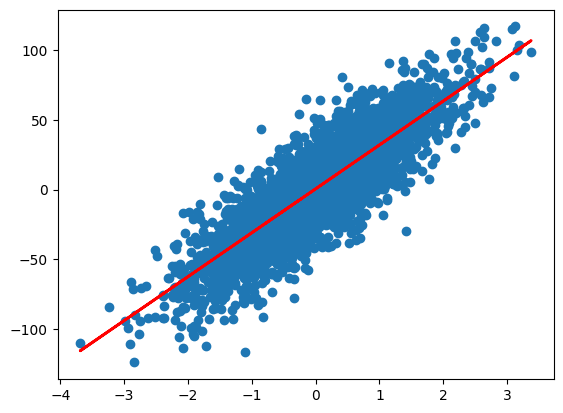

In [95]:
import matplotlib.pyplot as plt

plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.scatter(X_test, y_test)
